In [1]:
%load_ext autoreload
%autoreload 2

from os import path
import notebook_path
import numpy as np
import pandas as pd
import librosa 


In [2]:
from util import get_depl_dir
import os

depl = get_depl_dir(1, 1)
os.listdir(depl)

['1_Summary.txt', 'Data', 'SMA08742_Summary.txt']

In [3]:
data = depl + "/Data/"

# recording = data + os.listdir(data)[0]
recording = data + "1_20230316_063000.wav"
y, sr = librosa.load(recording)
y, sr, recording

(array([ 0.0014748 , -0.00773574,  0.00424524, ..., -0.0103202 ,
        -0.00656681,  0.00980964], dtype=float32),
 22050,
 'E:\\acoustic-AL-dataset\\site01\\deployment_001/Data/1_20230316_063000.wav')

In [4]:
# y, sr = librosa.load(librosa.example('trumpet'), sr=None)
y, sr = librosa.load(recording)

time_start = 7 * 60 + 22 # (s)
time_end = 8 * 60

y = y[time_start * sr : time_end * sr]

frame_length = 2048
hop_length = 512

stft = np.abs(librosa.stft(y, n_fft=frame_length, hop_length=hop_length))

log_energy = np.log(np.sum(stft ** 2, axis=0) + 1e-10)  

In [5]:
from sklearn.mixture import GaussianMixture

log_energy = log_energy.reshape(-1, 1)

gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(log_energy)

labels = gmm.predict(log_energy)

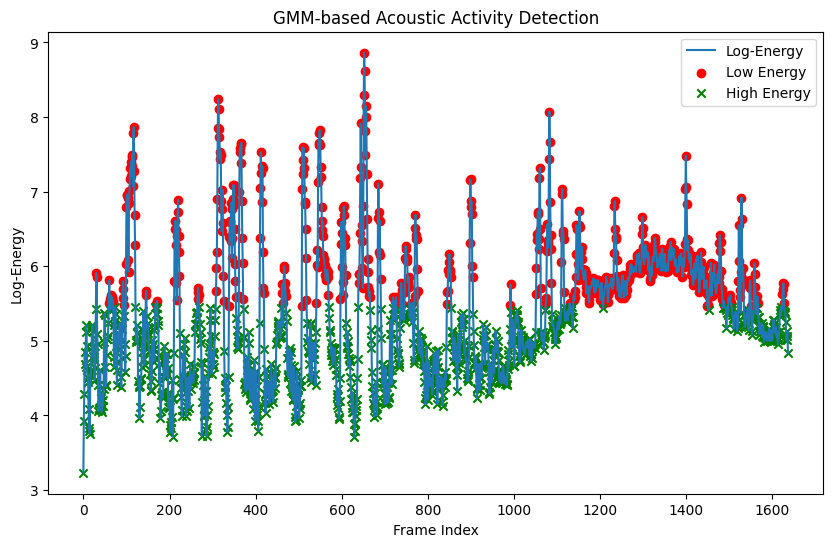

In [6]:
import matplotlib.pyplot as plt

low_energy_frames = log_energy[labels == 0]
high_energy_frames = log_energy[labels == 1]

plt.figure(figsize=(10, 6))
plt.plot(log_energy, label='Log-Energy')
plt.scatter(np.where(labels == 0), low_energy_frames, color='r', marker='o', label='Low Energy')
plt.scatter(np.where(labels == 1), high_energy_frames, color='g', marker='x', label='High Energy')
plt.legend()
plt.xlabel('Frame Index')
plt.ylabel('Log-Energy')
plt.title('GMM-based Acoustic Activity Detection')
plt.savefig("figures/gmm_lowhigh_detection.png")
plt.show()

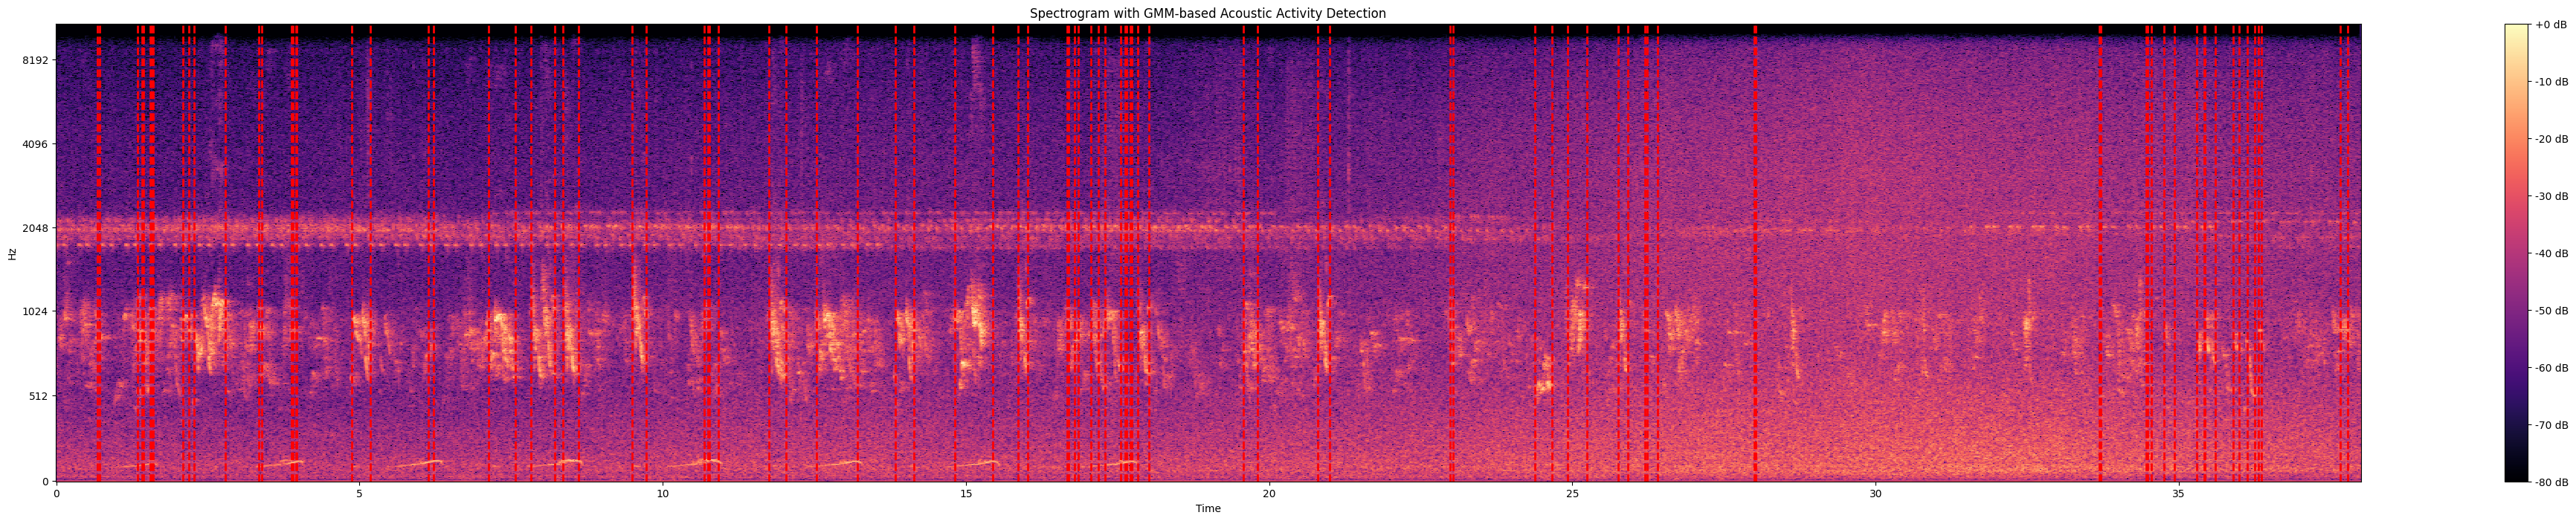

In [7]:
# S = librosa.stft(y)
# S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
# img = librosa.display.specshow(S_db, y_axis="linear", sr=sr)

boundaries = np.where(np.diff(labels) != 0)[0]

import librosa.display

plt.figure(figsize=(50, 8))
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram with GMM-based Acoustic Activity Detection')

times = librosa.frames_to_time(boundaries, sr=sr, hop_length=hop_length)
for boundary in times:
    plt.axvline(x=boundary, color='r', linestyle='--', linewidth=2)

plt.savefig("figures/sed2.png")
plt.show()

In [16]:
times = librosa.frames_to_time(boundaries, sr=sr, hop_length=hop_length)

segments = [
    (times[i], times[i+1]) for i in range(len(times[::2]))
]   

segments = segments[::2]
segments 

[(0.6733786848072563, 0.7198185941043084),
 (1.3467573696145125, 1.4164172335600906),
 (1.4396371882086167, 1.555736961451247),
 (1.5789569160997732, 1.6021768707482993),
 (2.089795918367347, 2.182675736961451),
 (2.2755555555555556, 2.786394557823129),
 (3.3436734693877552, 3.3901133786848074),
 (3.877732426303855, 3.900952380952381),
 (3.947392290249433, 3.9706122448979593),
 (4.876190476190477, 5.178049886621316),
 (6.130068027210885, 6.222947845804988),
 (7.128526077097506, 7.569705215419501),
 (7.825124716553288, 8.219863945578231),
 (8.359183673469389, 8.614603174603175),
 (9.496961451247165, 9.729160997732427),
 (10.681179138321996, 10.750839002267574),
 (10.7740589569161, 10.913378684807256),
 (11.749297052154194, 12.027936507936507),
 (12.538775510204081, 13.212154195011339),
 (13.839092970521541, 14.140952380952381),
 (14.814331065759637, 15.441269841269841),
 (15.85922902494331, 16.021768707482995),
 (16.671927437641724, 16.69514739229025),
 (16.788027210884355, 16.857687074

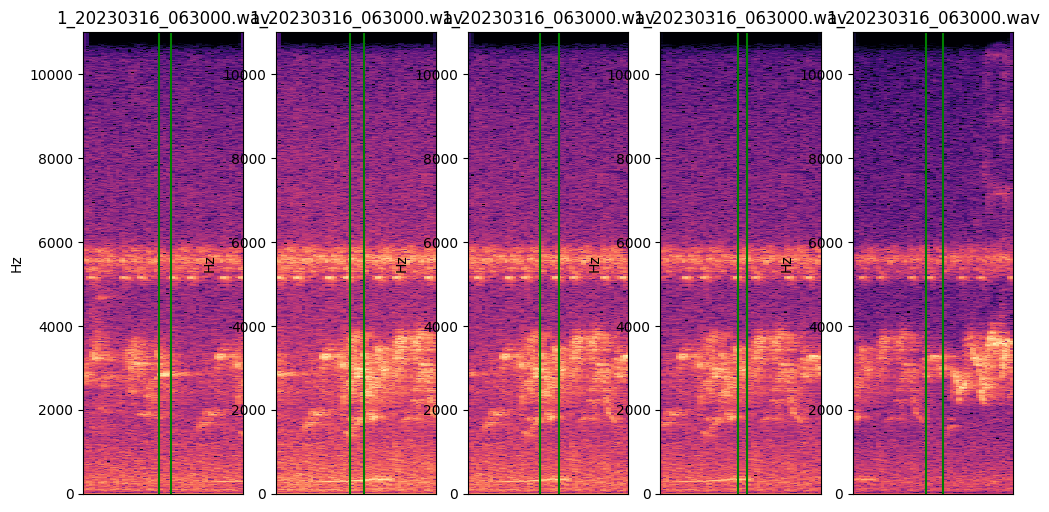

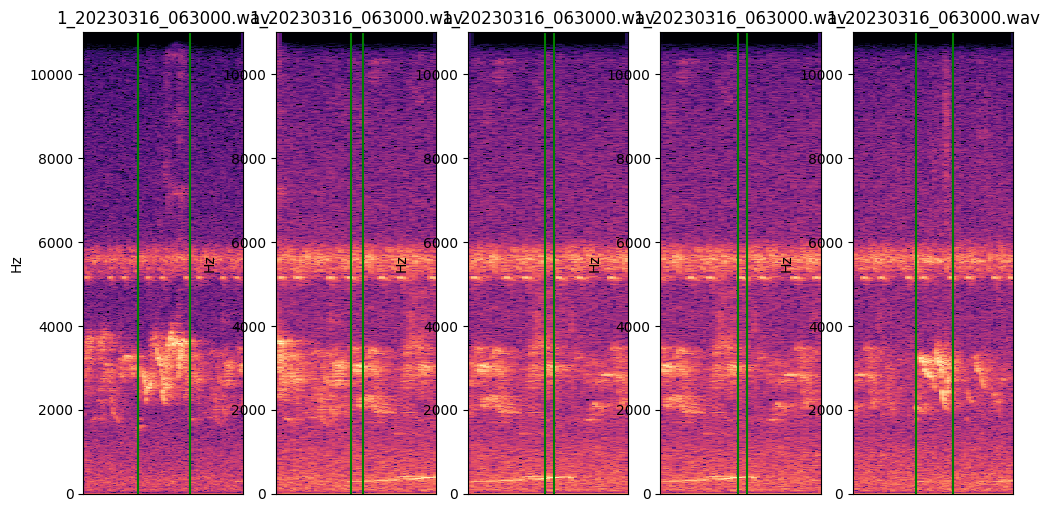

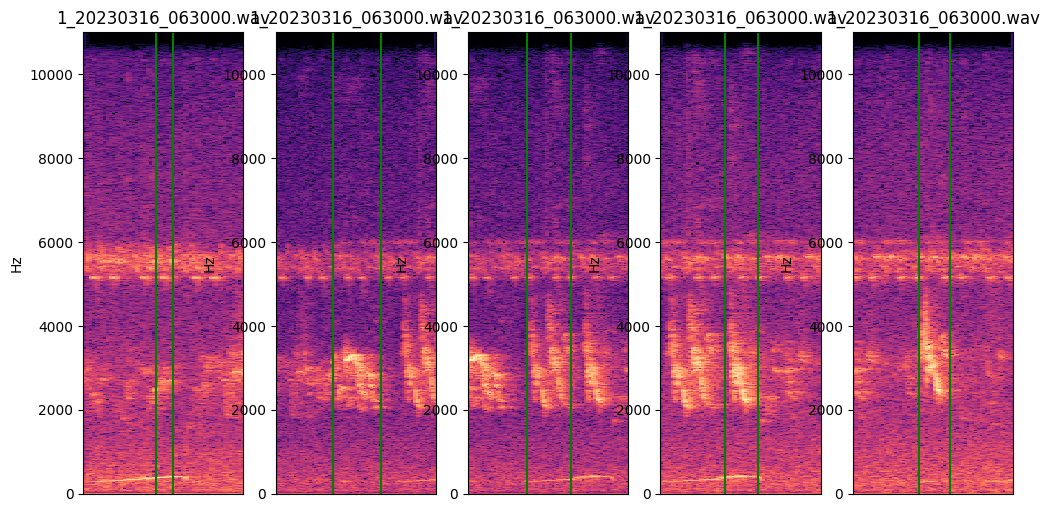

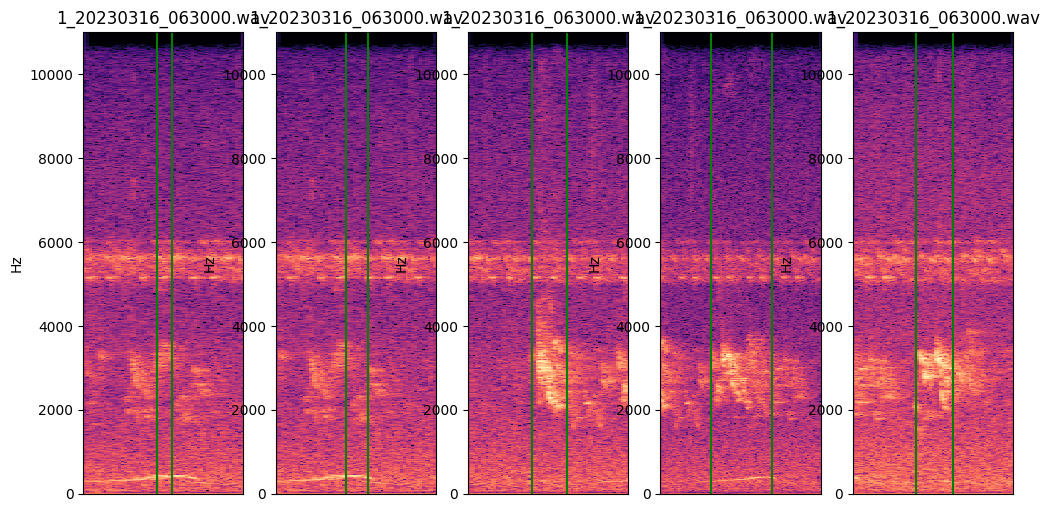

StopIteration: 

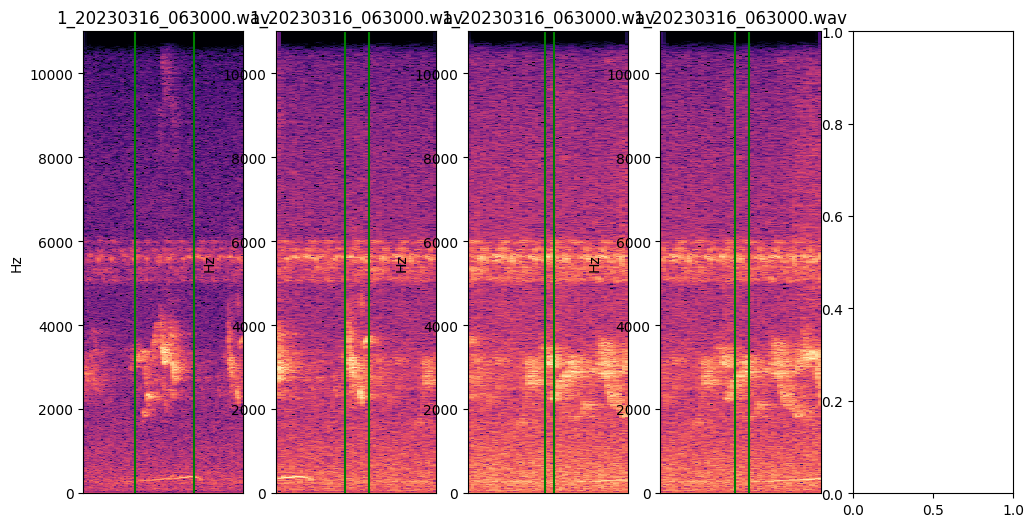

In [17]:
from plotting import view_spectrogram

segments_iter = iter(segments)

for _ in range(20):
    
    fig, axes = plt.subplots(1, 5, figsize=(12, 6))

    for i in range(5):
        
        start, end = next(segments_iter)
        start += time_start
        end += time_start
            
        view_spectrogram( 
            ax=axes[i],
            title=None,
            sr=22_000,
            file_path=recording,
            time_segment=(start, end),
            playback=True
        )  
            
    plt.show()